## 데이터사이언스전공 201804223 이나라 

In [2]:
import pandas as pd
import numpy as np


In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [4]:
telco = pd.read_csv('data/telco.csv')

### 1. 데이터 살펴보기

Leave - 가입해지여부(1이면 해지)  
MemberWeeks - 가입기간  
NewContract - 가입갱신여부(1이면 갱신)  
IsData - 데이터요금제사용여부(1이면 사용)  
DataAmount - 데이터사용량(GB)  
Callcenter - 고객센터전화량  
CalMins - 월평균전화량(분)  
CalCounts - 월평균전화수(횟수)  
MonthlyFee - 월평균요금  
OverFee - 초과요금  
RoamingMin - 로밍시간(분)  

In [5]:
telco

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [6]:
# 데이터사용량 
telco.DataAmount.value_counts()

0.00    1813
0.31      41
0.21      39
0.29      36
0.26      34
        ... 
4.13       1
4.59       1
0.68       1
4.29       1
4.64       1
Name: DataAmount, Length: 174, dtype: int64

In [7]:
# 월평균이용요금

telco.MonthlyFee.value_counts()

50.0     84
46.0     75
45.0     74
49.0     73
54.0     72
         ..
36.3      1
54.7      1
86.4      1
89.5      1
103.8     1
Name: MonthlyFee, Length: 627, dtype: int64

In [8]:
# 고객센터전화량
telco.Callcenter.value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
8       2
9       2
Name: Callcenter, dtype: int64

In [9]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Leave        3333 non-null   int64  
 1   MemberWeeks  3333 non-null   int64  
 2   NewContract  3333 non-null   int64  
 3   IsData       3333 non-null   int64  
 4   DataAmount   3333 non-null   float64
 5   Callcenter   3333 non-null   int64  
 6   CalMins      3333 non-null   float64
 7   CalCounts    3333 non-null   int64  
 8   MonthlyFee   3333 non-null   float64
 9   OverFee      3333 non-null   float64
 10  RoamingMin   3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [10]:
# 결측값 확인
telco.isnull().sum()

Leave          0
MemberWeeks    0
NewContract    0
IsData         0
DataAmount     0
Callcenter     0
CalMins        0
CalCounts      0
MonthlyFee     0
OverFee        0
RoamingMin     0
dtype: int64

In [11]:
# Leave - 가입해지여부(1이면 해지) 
# NewContract - 가입갱신여부(1이면 갱신)
# IsData - 데이터요금제사용여부(1이면 사용) category 로 변경
 
print(telco.Leave.value_counts(),
      telco.NewContract.value_counts(),
      telco.IsData.value_counts())

0    2850
1     483
Name: Leave, dtype: int64 1    3010
0     323
Name: NewContract, dtype: int64 0    2411
1     922
Name: IsData, dtype: int64


#### <데이터타입 변환하기>

In [12]:
telco['Leave']= telco['Leave'].astype('category')
telco['NewContract']=telco['NewContract'].astype('category')
telco['IsData']=telco['IsData'].astype('category')

In [13]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Leave        3333 non-null   category
 1   MemberWeeks  3333 non-null   int64   
 2   NewContract  3333 non-null   category
 3   IsData       3333 non-null   category
 4   DataAmount   3333 non-null   float64 
 5   Callcenter   3333 non-null   int64   
 6   CalMins      3333 non-null   float64 
 7   CalCounts    3333 non-null   int64   
 8   MonthlyFee   3333 non-null   float64 
 9   OverFee      3333 non-null   float64 
 10  RoamingMin   3333 non-null   float64 
dtypes: category(3), float64(5), int64(3)
memory usage: 218.6 KB


In [14]:
telco.describe().T

,count,mean,std,min,25%,50%,75%,max
MemberWeeks,3333.0,101.064806,39.822106,1.0,74.00,101.00,127.00,243.00
DataAmount,3333.0,0.816475,1.272668,0.0,0.00,0.00,1.78,5.40
Callcenter,3333.0,1.562856,1.315491,0.0,1.00,1.00,2.00,9.00
CalMins,3333.0,179.775098,54.467389,0.0,143.70,179.40,216.40,350.80
CalCounts,3333.0,100.435644,20.069084,0.0,87.00,101.00,114.00,165.00
MonthlyFee,3333.0,56.305161,16.426032,14.0,45.00,53.50,66.20,111.30
OverFee,3333.0,10.051488,2.535712,0.0,8.33,10.07,11.77,18.19
RoamingMin,3333.0,10.237294,2.791840,0.0,8.50,10.30,12.10,20.00


### 2. 데이터분석
데이터 간의 상관관계와 연관성 파악하고 시각화하기

#### < 여러 피처 간 상관관계 파악하기>

In [15]:
# 상관계수 구하기

cols= ['MemberWeeks','DataAmount','Callcenter','CalMins','CalCounts','MonthlyFee','OverFee','RoamingMin']
corr = telco[cols].corr()
print(corr)

             MemberWeeks  DataAmount  Callcenter   CalMins  CalCounts  \
MemberWeeks     1.000000    0.014391   -0.003796  0.006216   0.038470   
DataAmount      0.014391    1.000000   -0.021723  0.003176  -0.007962   
Callcenter     -0.003796   -0.021723    1.000000 -0.013423  -0.018942   
CalMins         0.006216    0.003176   -0.013423  1.000000   0.006750   
CalCounts       0.038470   -0.007962   -0.018942  0.006750   1.000000   
MonthlyFee      0.012581    0.781660   -0.028017  0.567968  -0.007963   
OverFee        -0.006749    0.019637   -0.012964  0.007038  -0.021449   
RoamingMin      0.009514    0.162746   -0.009640 -0.010155   0.021565   

             MonthlyFee   OverFee  RoamingMin  
MemberWeeks    0.012581 -0.006749    0.009514  
DataAmount     0.781660  0.019637    0.162746  
Callcenter    -0.028017 -0.012964   -0.009640  
CalMins        0.567968  0.007038   -0.010155  
CalCounts     -0.007963 -0.021449    0.021565  
MonthlyFee     1.000000  0.281766    0.117433  
OverFe

<AxesSubplot:>

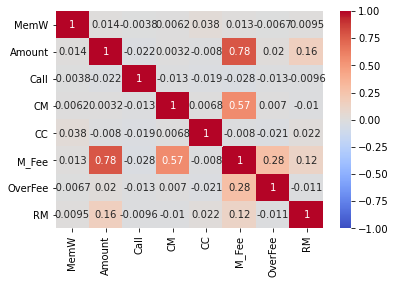

In [16]:
# corr 행렬 히트맵 시각화

cols_view= ['MemW','Amount','Call','CM','CC','M_Fee','OverFee','RM']
sns.heatmap(corr.values,
           annot = True,
           cmap = 'coolwarm',
           vmin = -1, vmax=1 , 
            yticklabels = cols_view,
            xticklabels = cols_view
          )

상관관계 분석결과, 피처가 대체적으로 상관관계가 없다고 볼 수 있다.  
통화시간 - 월평균요금 -> 가장 높은 상관성을 띈다.  
월평균요금 - 추가요금 -> 두 번째로 높은 상관성을 보이며 높은 편이다.  
데이터사용량 - 로밍시간, 월평균요금 - 로밍시간은 -> 상관성이 낮으나, 상관관계가 있다.

#### <가입해지여부와 데이터사용여부에 따른 평균값, 최소값, 최댓값 한번에 파악하기>

In [17]:
(
    telco
    .groupby(['Leave','IsData'])
    [['DataAmount','CalMins','MonthlyFee','RoamingMin']]
    .agg(['mean','min','max'])
    .rename_axis(['AGG_COLS','AGG_FUNCS'], axis=1)
    #.sort_index(level='AGG_COLS', axis = 1)
)

AGG_COLS     DataAmount                 CalMins              MonthlyFee        \
AGG_FUNCS          mean   min   max        mean   min    max       mean   min   
Leave IsData                                                                    
0     0        0.074895  0.00  0.51  173.188147   0.0  310.4  47.475050  15.7   
      1        2.739596  0.00  4.75  179.915796   2.6  315.6  75.708314  26.0   
1     0        0.058089  0.00  0.45  212.934739   0.0  350.8  55.491563  14.0   
      1        3.009625  1.11  5.40  176.585000  82.3  322.4  77.821250  56.7   

AGG_COLS            RoamingMin             
AGG_FUNCS       max       mean  min   max  
Leave IsData                               
0     0        70.0  10.164890  0.0  18.9  
      1       111.3  10.144537  0.0  17.6  
1     0        84.0  10.611663  2.0  18.3  
      1       110.0  11.145000  4.1  20.0

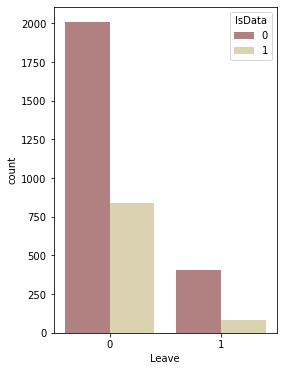

In [18]:
plt.figure(figsize=(4,6))
cnt=sns.countplot(x='Leave',hue='IsData',data=telco ,palette='pink')
cnt.set_xlabel("Leave")
plt.show()

#### < 개별 피처 확인하기>  
데이터사용량, 월평균전화수, 월평균전화량, 로밍시간 분포 파악하기  

분포 확인 결과,  
데이터사용량을 제외한 월평균전화수, 월평균전화량, 로밍시간은 정규분포와 유사한 형태를 따른다.

In [19]:
cut_point = telco["DataAmount"].quantile(0.99)
df_cut=telco[telco['DataAmount'] < cut_point]

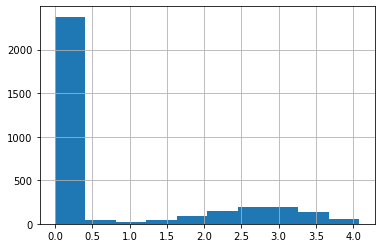

In [20]:
# 데이터사용량 분포

df_cut['DataAmount'].hist()
plt.show()

<AxesSubplot:xlabel='RoamingMin'>

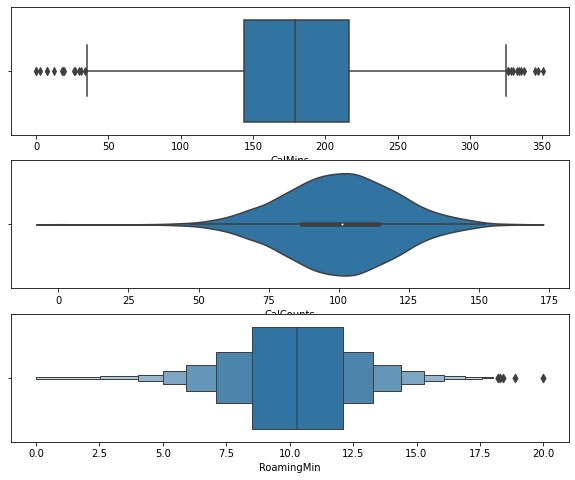

In [21]:
# 월평균전화량, 월평균전화수, 로밍시간 분포

fig, axs = plt.subplots(nrows=3, figsize=(10,8))

sns.boxplot(x=telco.CalMins, ax=axs[0])
sns.violinplot(x=telco.CalCounts, ax=axs[1])
sns.boxenplot(x=telco.RoamingMin, ax=axs[2])

#### 1. 통화량과 통화수는 비례한가?  
상관성이 전혀 없고 고객센터전화수와도 관계가 없는 결과이다.

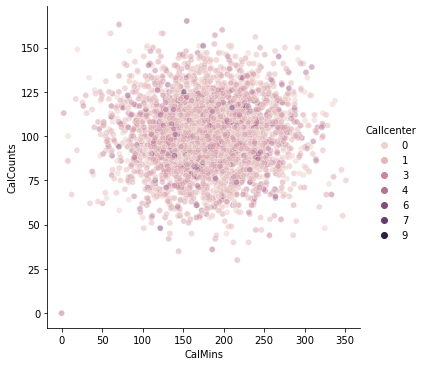

In [22]:
sns.relplot(
    x='CalMins',
    y='CalCounts',
    data=telco,
    hue='Callcenter',
    alpha=.5, 
    height=5  
)

#### 2. 로밍시간이 길수록 추가요금은 더 나온다?
로밍시간과 추가요금은 관련이 없다.

<Figure size 720x360 with 0 Axes>

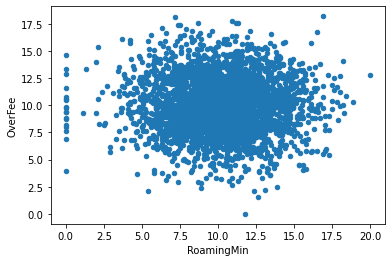

In [23]:
plt.figure(figsize=(10,5))
telco.plot.scatter(x='RoamingMin',y='OverFee')
plt.show()

#### 3. 월평균통화량이 높으면 월평균요금도 높을 것이다?
두 피처는 높은 상관관계를 띄고 통화량이 많으면 요금도 늘어날 것이라고 예측할수 있다.

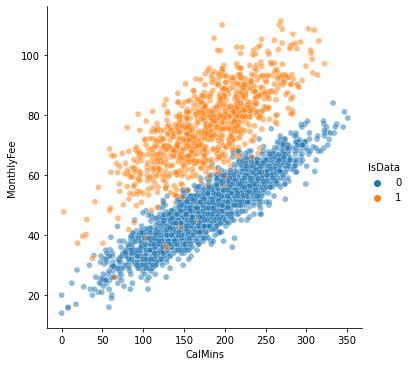

In [24]:
sns.relplot(
    x='CalMins',
    y='MonthlyFee',
    data=telco,
    hue='IsData',
    alpha=.5, 
    height=5  
)

#### 4. 데이터요금제사용여부에 따라서 월평균요금과 추가요금의 차이가 있나?
데이터요금제를 사용하지 않는 집단은 사용하는 집단보다 월평균요금이 적다.  
월평균요금이 높을수록 추가요금도 증가하는 것을 확인할 수 있다.

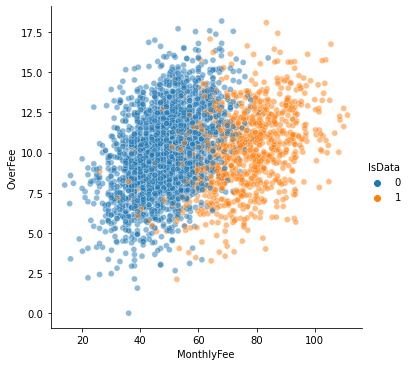

In [25]:
sns.relplot(
    x='MonthlyFee',
    y='OverFee',
    data=telco,
    hue='IsData',
    alpha=.5, 
    height=5  
)

#### 5. 데이터사용량이 높으면 월평균 요금도 높을 것이다?
<데이터사용량 범주화하기>  
데이터사용량을 범주화해서 구간별로 월평균요금이 증가하는지 비교한다.


In [26]:
# 데이터 사용하지 않는 집단(0) 제외
telco1 = telco[telco.DataAmount > 0.3] 

<AxesSubplot:>

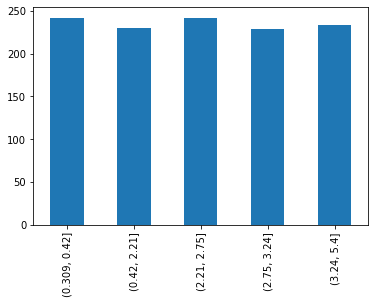

In [27]:
# 데이터사용량 분위수로 나누기
(
    telco1.DataAmount.pipe(
        lambda ser: pd.qcut(ser, q=5)
    ).value_counts().sort_index().plot.bar()
)

In [28]:
# 데이터사용량 동일한 너비구간으로 나누기
bins = [-np.inf, 0, 1, 2, 3, 4,5, np.inf]
cuts = pd.cut(telco1.DataAmount, bins=bins)
cuts

0       (2.0, 3.0]
1       (3.0, 4.0]
6       (2.0, 3.0]
9       (3.0, 4.0]
11      (0.0, 1.0]
           ...    
3323    (0.0, 1.0]
3326    (0.0, 1.0]
3328    (2.0, 3.0]
3329    (0.0, 1.0]
3332    (3.0, 4.0]
Name: DataAmount, Length: 1175, dtype: category
Categories (7, interval[float64]): [(-inf, 0.0] < (0.0, 1.0] < (1.0, 2.0] < (2.0, 3.0] < (3.0, 4.0] < (4.0, 5.0] < (5.0, inf]]

<AxesSubplot:>

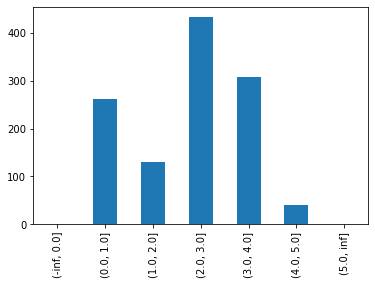

In [29]:
cuts.value_counts().sort_index().plot.bar()

범주화하여 비교한 결과 ,  
높은데이터를 사용할수록 월평균요금이 높아진다.

<AxesSubplot:xlabel='DataAmount', ylabel='MonthlyFee'>

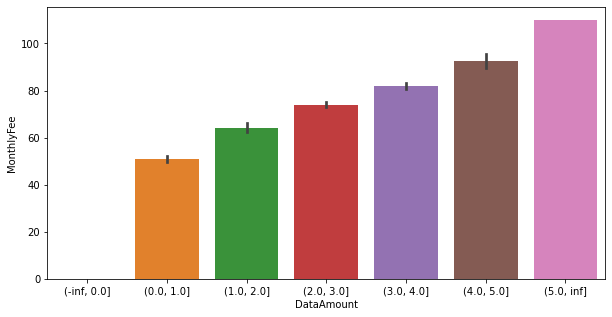

In [30]:
fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(x=cuts, y='MonthlyFee',data=telco1)

#### <데이터요금제사용여부에 따른 추가요금 분포>
위 결과에서 데이터를 사용하는 집단이 사용하지 않는 집단에 비해 월평균요금량이 월등히 높다는 것을 알 수 있었다.  
월평균요금량은 확연히 차이가 있다. 그럼 데이터요금제사용여부에 따른 추가요금량 차이가 있다고 예상된다.

결과는, 두 집단 간에 추가요금량 차이는 없다.

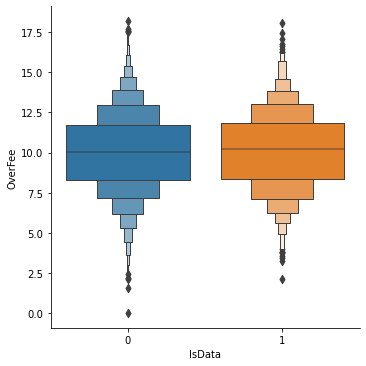

In [31]:
sns.catplot(x='IsData',y='OverFee', kind='boxen',data=telco)

plt.show()

#### <가입갱신여부에 따른 고객센터전화양 비교>
두 집단 모두 평균 고객센터전화양의 비율이 같지만  
갱신한집단과 비교해 갱신하지않은집단의 고객센터전화양이 0인 비율이 더욱 많았고   
갱신한집단은 고객센터전화양의 최대값이 높은 것을 알 수 있다.

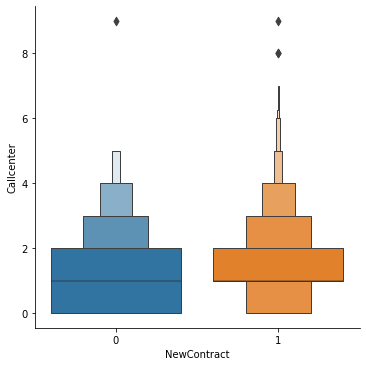

In [32]:
sns.catplot(x='NewContract',y='Callcenter', kind='boxen',data=telco)

plt.show()

#### <가입여부에 따른 월평균요금 비교>
해지한 집단이 월평균요금의 평균이 더욱 높다.

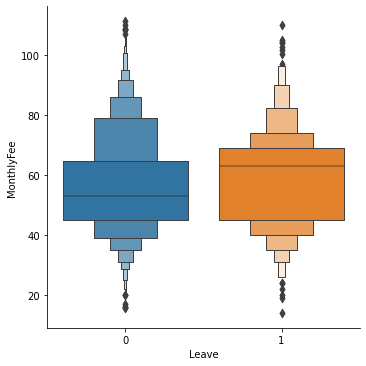

In [33]:
sns.catplot(x='Leave',y='MonthlyFee', kind='boxen',data=telco)

plt.show()

### <의미도출>

1. 가입한해지한 집단의 데이터요금제사용이 가입한 집단의 데이터요금제사용보다 월등히 낮다  
2. 가입한 집단의 월평균요금 평균이 더 낮다. 
3. 데이터요금제를 사용하는 집단이 그렇지 않은 집단보다 월평균요금을 더욱 많이 낸다
4. 월평균통화량이 높으면 월평균요금도 증가한다.  
5. 데이터사용량이 높을수록 월평균요금이 증가한다.  


예상과 달랐던 결과
- 통화량과 통화수는 서로 연관이 없다.  
- 로밍시간과 추가요금은 관련이 없다.  
- 가입갱신여부는 고객센터전화량의 평균비율은 같지만 갱신한 집단은 고객센터전화량의 최댓값이 높았고  
그렇지 않은 집단은 전화량이 0번인 비율이 많았다.